# Import Some libraries to use it in our project

In [1]:
from PIL import Image
import os
import hashlib
import cv2 #module from the OpenCV (Open Source Computer Vision) library, . It provides functions for reading, writing, and manipulating images .  cv2 module is used to read the image files from the dataset directory, resize them to a fixed size, convert them to RGB color space, and normalize their pixel values to range [0, 1].
import numpy as np
from skimage import io, exposure
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Read data device 

In [2]:
#list all the categories (folders) in your dataset directory and print the number of categories found.
categories = os.listdir("F:\LEVEL 2 2\Machine Learning\p\data0330")
num_categories = len(categories)
print("Number of categories:", num_categories)



Number of categories: 2


In [3]:
#create a dictionary that maps each category to a label (integer value).
category_to_label = {}
for i, category in enumerate(categories):
    category_to_label[category] = i
print("Category to label mapping:", category_to_label)

#Resizing all images have same dimension to 
# Define the target size of the images
target_size = (64,64)




Category to label mapping: {'bald': 0, 'notbald': 1}


# Data Cleaning

## Resize images

In [4]:
# Define a function to resize images in a directory
def resize_images(directory):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Check if the file is an image
        if filepath.endswith(".jpg") or filepath.endswith(".png"):
            # Open the image file
            with Image.open(filepath) as img:
                # Resize the image to the target size
                resized_img = img.resize(target_size)
                # Save the resized image back to the file
                resized_img.save(filepath)

resize_images(r'F:\LEVEL 2 2\Machine Learning\p\data0330\bald')

resize_images(r'F:\LEVEL 2 2\Machine Learning\p\data0330\notbald')


## Normalize images

In [5]:
# normalization  adjusting the pixel values in the image so that they fall within a specific range
# to reduce the impact of differences in lighting or contrast between images
# Define a function to normalize images in a directory
def normalize_images(directory):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Check if the file is an image
        if filepath.endswith(".jpg") or filepath.endswith(".png"):
            # Read the image file
            img = io.imread(filepath)
            # Normalize the image to the target range
            normalized_img = exposure.rescale_intensity(img, in_range='image', out_range=(0,1)) #target_range = (0, 1)
            # Save the normalized image back to the file
            io.imsave(filepath, normalized_img)

normalize_images(r'F:\LEVEL 2 2\Machine Learning\p\data0330\bald')

normalize_images(r'F:\LEVEL 2 2\Machine Learning\p\data0330\notbald')



Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

## Remove duplicate

In [6]:
def remove_duplicate_images(directory):
    # Create a dictionary to store the hash values of images
    hash_dict = {}

    # Loop through all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        # Calculate the hash value of the image
        with open(filepath, 'rb') as f:
            hash_value = hashlib.md5(f.read()).hexdigest()

        # Check if the hash value is already in the dictionary
        if hash_value in hash_dict:
            # Delete the duplicate image file
            os.remove(filepath)
            print("Removed duplicate image:", filepath)
        else:
            # Add the hash value to the dictionary
            hash_dict[hash_value] = filepath


remove_duplicate_images(r'F:\LEVEL 2 2\Machine Learning\p\data0330\bald')

remove_duplicate_images(r'F:\LEVEL 2 2\Machine Learning\p\data0330\notbald')


Removed duplicate image: F:\LEVEL 2 2\Machine Learning\p\data0330\bald\tonyimagess129.jpg


## Remove corrupt

In [7]:
# Define a function to remove corrupt images
def remove_corrupt_images(directory):
    # Loop through all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        try:
            # Attempt to open the image file
            with Image.open(filepath) as img:
                img.verify()
        except (IOError, SyntaxError) as e:
            # Delete the corrupt image file
            os.remove(filepath)
            print("Removed corrupt image:", filepath)

remove_corrupt_images(r'F:\LEVEL 2 2\Machine Learning\p\data0330\bald')

remove_corrupt_images(r'F:\LEVEL 2 2\Machine Learning\p\data0330\notbald')

## Set the name of the directory containing the images

In [8]:
# Set the name of the directory containing the images
directory_name = "F:\LEVEL 2 2\Machine Learning\p\data0330"

# Set the new category names
categories = ["bald", "notbald"]

for category in categories:
    # Get a list of all the files in the directory with the given category
    files = os.listdir(os.path.join(directory_name, category))

    # Rename each file with the new category name and a unique number
    for i, file in enumerate(files):
        os.rename(
            os.path.join(directory_name, category, file), 
            os.path.join(directory_name, category, f"{category}.{i+1}.jpg")
        )


# Data Agumation

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.3)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.3)


# Split our data to training and Validation sets

In [23]:
training_set = train_datagen.flow_from_directory('F:\LEVEL 2 2\Machine Learning\p\data0330',
                                                 target_size=target_size,
                                                batch_size=32,
                                     class_mode='categorical',
                                            subset='training')

validation_set = test_datagen.flow_from_directory('F:\LEVEL 2 2\Machine Learning\p\data0330',
                                                  target_size=target_size,
                                                 batch_size=32,
                                      class_mode='categorical',
                                               shuffle = False,
                                           subset='validation')

Found 780 images belonging to 2 classes.
Found 333 images belonging to 2 classes.


# ANN ALGORITHM 

In [28]:
# ANN ALGORITHM 
model = Sequential()
model.add(Flatten(input_shape=(64, 64, 3)))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(training_set,
          epochs=100,
          validation_data=validation_set)


Epoch 1/100


C:\Users\Mohamed Bayomey\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.5098 - loss: 0.9365 - val_accuracy: 0.5015 - val_loss: 6.9196
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5847 - loss: 0.7014 - val_accuracy: 0.5015 - val_loss: 3.4422
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5854 - loss: 0.6837 - val_accuracy: 0.5105 - val_loss: 1.6844
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.6033 - loss: 0.6756 - val_accuracy: 0.5015 - val_loss: 2.1822
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6054 - loss: 0.6676 - val_accuracy: 0.5135 - val_loss: 1.5499
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6199 - loss: 0.6382 - val_accuracy: 0.5255 - val_loss: 1.0234
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6561 - loss: 0.6422 - val_accuracy: 0.5405 - val_loss: 0.9163
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6216 - loss: 0.6480 - val_accuracy: 0.5315 - val_l

## Test accuracy for ANN algorithm

In [29]:
test_generator = test_datagen.flow_from_directory(
    directory='F:\LEVEL 2 2\Machine Learning\p\data0330',
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy for ANN ALGORITHM :", test_acc)


Found 1113 images belonging to 2 classes.
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6073 - loss: 0.6262
Test accuracy for ANN ALGORITHM : 0.6379155516624451


### The classification_report provides the following metrics for each class:

1. Precision: The proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives).
2. Recall: The proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives).
3. F1-score: The harmonic mean of precision and recall, giving a balance between the two metrics. It is calculated as 2 * (precision * recall) / (precision + recall).
4. Support: The number of actual occurrences of the class in the specified dataset.
5. Accuracy: The proportion of correctly classified instances out of the total instances.

In [30]:
# Get the predicted labels for the validation set
y_pred = model.predict(validation_set)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation set
y_true = validation_set.classes

# Compute the precision, recall, f1-score, and support
target_names = ['notbald', 'bald']

print("Report for ANN ALGORITHM ")

print(classification_report(y_true, y_pred, target_names=target_names))


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Report for ANN ALGORITHM 
              precision    recall  f1-score   support

     notbald       0.56      0.54      0.55       167
        bald       0.55      0.57      0.56       166

    accuracy                           0.55       333
   macro avg       0.55      0.55      0.55       333
weighted avg       0.55      0.55      0.55       333



# Tests each ANN model with new input data.

In [37]:
# Load the image
img = cv2.imread(r"Downloads\bald.jpeg")

# Preprocess the image
img = cv2.resize(img, target_size)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Print the prediction
if prediction[0][0] > 0.5:
    print('The model predicts that the image shows a bald person.')
else:
    print('The model predicts that the image shows a person with hair.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The model predicts that the image shows a bald person.


# CNN ALGORITHM 

In [51]:
### CNN ALGORITHM 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(training_set,
          epochs=100,
          validation_data=validation_set)



C:\Users\Mohamed Bayomey\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 0.5034 - loss: 0.7149 - val_accuracy: 0.6366 - val_loss: 0.6732
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.5576 - loss: 0.6785 - val_accuracy: 0.7237 - val_loss: 0.6267
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.6028 - loss: 0.6608 - val_accuracy: 0.7147 - val_loss: 0.6009
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.6150 - loss: 0.6563 - val_accuracy: 0.7417 - val_loss: 0.5955
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.6415 - loss: 0.6463 - val_accuracy: 0.6967 - val_loss: 0.5812
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.6759 - loss: 0.6306 - val_accuracy: 0.7237 - val_loss: 0.5792
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.6741 - loss: 0.5957 - val_accuracy: 0.7297 - val_loss: 0.5666
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6928 - loss: 0.6104 - val_accu

## Test accuracy for CNN algorithm

In [52]:
test_generator = test_datagen.flow_from_directory(
    directory='F:\LEVEL 2 2\Machine Learning\p\data0330',
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy for CNN ALGORITHM :", test_acc)


Found 1113 images belonging to 2 classes.
 9/35 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8232 - loss: 0.6570

C:\Users\Mohamed Bayomey\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8644 - loss: 0.4551
Test accuracy for CNN ALGORITHM : 0.8975741267204285


### The classification_report provides the following metrics for each class:

1. Precision: The proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives).
2. Recall: The proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives).
3. F1-score: The harmonic mean of precision and recall, giving a balance between the two metrics. It is calculated as 2 * (precision * recall) / (precision + recall).
4. Support: The number of actual occurrences of the class in the specified dataset.
5. Accuracy: The proportion of correctly classified instances out of the total instances.

In [53]:
# Get the predicted labels for the validation set
y_pred = model.predict(validation_set)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation set
y_true = validation_set.classes

# Compute the precision, recall, f1-score, and support
target_names = ['notbald', 'bald']

print("Report for CNN ALGORITHM ")
print(classification_report(y_true, y_pred, target_names=target_names))


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Report for CNN ALGORITHM 
              precision    recall  f1-score   support

     notbald       0.77      0.81      0.79       167
        bald       0.80      0.76      0.78       166

    accuracy                           0.79       333
   macro avg       0.79      0.79      0.79       333
weighted avg       0.79      0.79      0.79       333



# Tests each CNN model with new input data.

In [54]:
img = cv2.imread(r"Downloads\hair.jpeg")

# Preprocess the image
img = cv2.resize(img, target_size)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Print the prediction
if prediction[0][0] > 0.5:
    print('The model predicts that the image shows a bald person.')
else:
    print('The model predicts that the image shows a person with hair.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The model predicts that the image shows a person with hair.


In [59]:
img = cv2.imread(r"Downloads\bald.jpeg")

# Preprocess the image
img = cv2.resize(img, target_size)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

# Make the prediction
prediction = model.predict(img)

# Print the prediction
if prediction[0][0] > 0.5:
    print('The model predicts that the image shows a bald person.')
else:
    print('The model predicts that the image shows a person with hair.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The model predicts that the image shows a bald person.


# Compare Between two models ANN and CNN

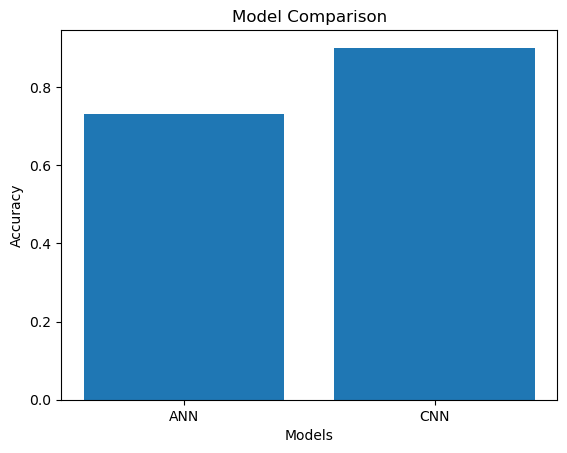

In [55]:
model_names=["ANN","CNN"]
accuracies=[0.73,0.90]
plt.bar(model_names,accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()



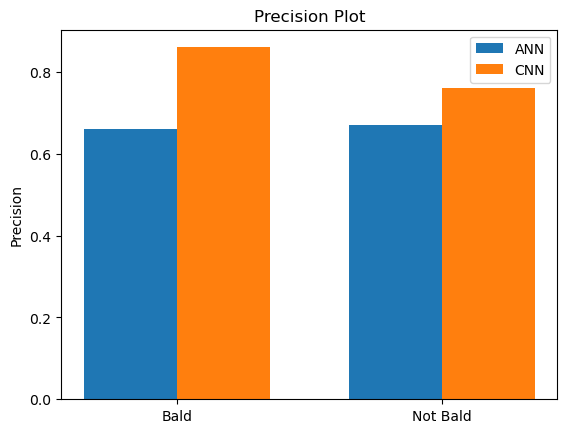

In [56]:
#Precision

categories = ['Bald', 'Not Bald']
values1 = [0.66, 0.67]
values2 = [0.86, 0.76]

# Set the position of the bars on the x-axis
x = np.arange(len(categories))

# Set the width of the bars
width = 0.35

# Create figure and axes
fig, ax = plt.subplots()

# Create bar plot
bar1 = ax.bar(x - width/2, values1, width, label='ANN')
bar2 = ax.bar(x + width/2, values2, width, label='CNN')

# Set labels and title
ax.set_ylabel('Precision')
ax.set_title('Precision Plot')

# Set the x-axis ticks and tick labels
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Create legend
ax.legend()

# Show plot
plt.show()


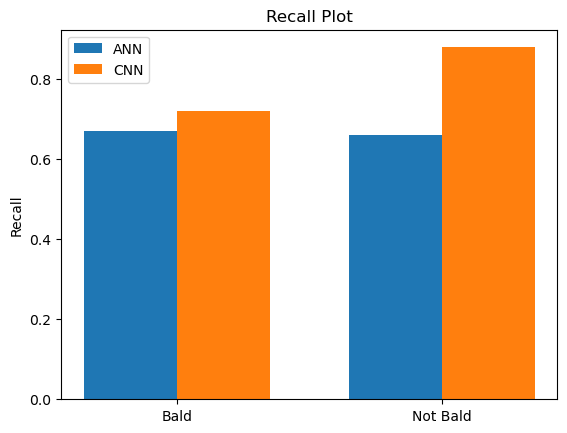

In [57]:

#recall

categories = ['Bald', 'Not Bald']
values1 = [0.67,0.66]
values2 = [0.72, 0.88]

# Set the position of the bars on the x-axis
x = np.arange(len(categories))

# Set the width of the bars
width = 0.35

# Create figure and axes
fig, ax = plt.subplots()

# Create bar plot
bar1 = ax.bar(x - width/2, values1, width, label='ANN')
bar2 = ax.bar(x + width/2, values2, width, label='CNN')

# Set labels and title
ax.set_ylabel('Recall')
ax.set_title('Recall Plot')

# Set the x-axis ticks and tick labels
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Create legend
ax.legend()

# Show plot
plt.show()


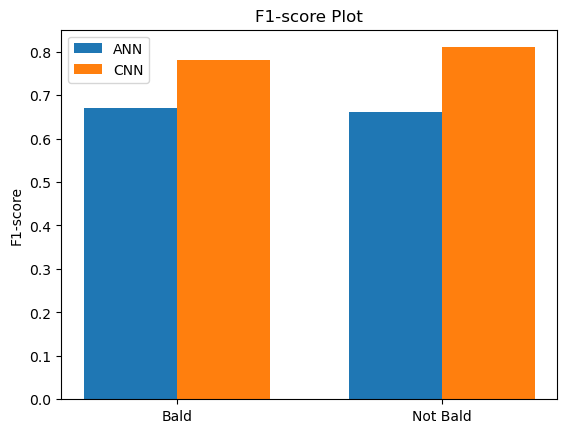

In [58]:
#F1-score

categories = ['Bald', 'Not Bald']
values1 = [0.67,0.66]
values2 = [0.78, 0.81]

# Set the position of the bars on the x-axis
x = np.arange(len(categories))

# Set the width of the bars
width = 0.35

# Create figure and axes
fig, ax = plt.subplots()

# Create bar plot
bar1 = ax.bar(x - width/2, values1, width, label='ANN')
bar2 = ax.bar(x + width/2, values2, width, label='CNN')

# Set labels and title
ax.set_ylabel('F1-score')
ax.set_title('F1-score Plot')

# Set the x-axis ticks and tick labels
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Create legend
ax.legend()

# Show plot
plt.show()